In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv(url, names=names)
print('We have {} rows and {} columns'.format(data.shape[0], data.shape[1]))
data.head()

We have 150 rows and 5 columns


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()

In [5]:
data['Class'] = encoder.fit_transform(data['Class'])

In [6]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = data[data['Class'] != 0][['sepal-width','petal-length','Class']]

In [8]:
df.head()

,sepal-width,petal-length,Class
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

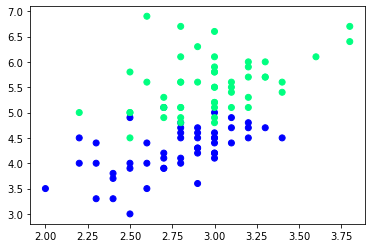

In [10]:
plt.scatter(df['sepal-width'],df['petal-length'],c=df['Class'],cmap='winter')

In [11]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal-width,petal-length,Class
71,2.8,4.0,1
104,3.0,5.8,2
59,2.7,3.9,1
96,2.9,4.2,1
57,2.4,3.3,1
60,2.0,3.5,1
58,2.9,4.6,1
109,3.6,6.1,2
107,2.9,6.3,2
99,2.8,4.1,1


In [12]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)    #top 60 rows, 10 random rows 
df_val = df.iloc[60:80,:].sample(5)      
df_test = df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal-width,petal-length,Class
143,3.2,5.9,2
107,2.9,6.3,2
113,2.5,5.0,2
63,2.9,4.7,1
148,3.4,5.4,2
61,3.0,4.2,1
122,2.8,6.7,2
149,3.0,5.1,2
66,3.0,4.5,1
81,2.4,3.7,1


In [14]:
df_val

,sepal-width,petal-length,Class
135,3.0,6.1,2
130,2.8,6.1,2
74,2.9,4.3,1
105,3.0,6.6,2
108,2.5,5.8,2


In [15]:
df_test

,sepal-width,petal-length,Class
133,2.8,5.1,2
95,3.0,4.2,1
109,3.6,6.1,2
128,2.8,5.6,2
103,2.9,5.6,2


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
y_test

array([2, 2, 1, 2, 2])

# Case 1 - Bagging

- Taking 3 DT

In [18]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [19]:
# Data for Tree 1

#8 ROWS GIVEN = 80% OF DATA, sampling with replacement
df_bag = df_train.sample(8,replace=True)  

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal-width,petal-length,Class
61,3.0,4.2,1
61,3.0,4.2,1
143,3.2,5.9,2
143,3.2,5.9,2
63,2.9,4.7,1
61,3.0,4.2,1
66,3.0,4.5,1
148,3.4,5.4,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1 = DecisionTreeClassifier()

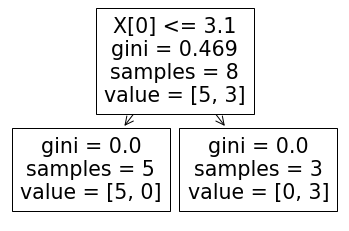

0.2


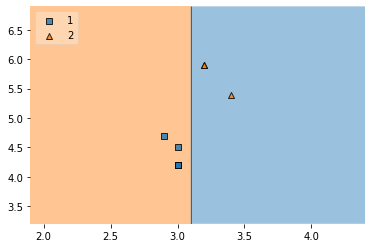

In [22]:
evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal-width,petal-length,Class
122,2.8,6.7,2
143,3.2,5.9,2
148,3.4,5.4,2
66,3.0,4.5,1
61,3.0,4.2,1
81,2.4,3.7,1
122,2.8,6.7,2
66,3.0,4.5,1


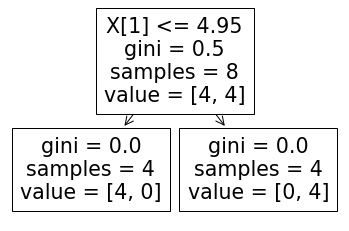

1.0


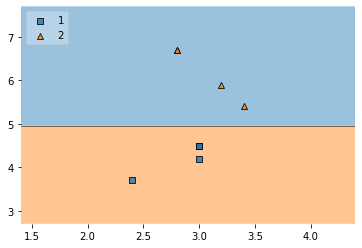

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal-width,petal-length,Class
148,3.4,5.4,2
61,3.0,4.2,1
113,2.5,5.0,2
122,2.8,6.7,2
61,3.0,4.2,1
66,3.0,4.5,1
81,2.4,3.7,1
63,2.9,4.7,1


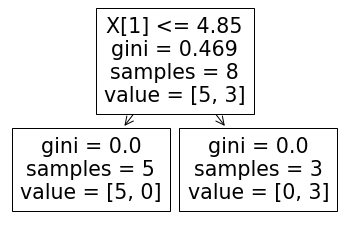

1.0


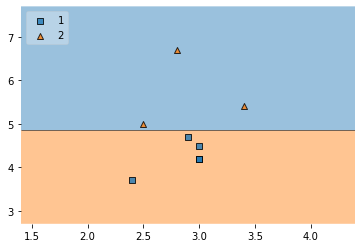

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## AGGREGATION - Predict

In [27]:
df_test

,sepal-width,petal-length,Class
133,2.8,5.1,2
95,3.0,4.2,1
109,3.6,6.1,2
128,2.8,5.6,2
103,2.9,5.6,2


In [33]:
print("Predictor 1",dt_bag1.predict(np.array([2.8, 5.1]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8, 5.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8, 5.1]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


In [34]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,5.6]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


# Pasting

In [35]:
# Row sampling without replacement
df_train

,sepal-width,petal-length,Class
143,3.2,5.9,2
107,2.9,6.3,2
113,2.5,5.0,2
63,2.9,4.7,1
148,3.4,5.4,2
61,3.0,4.2,1
122,2.8,6.7,2
149,3.0,5.1,2
66,3.0,4.5,1
81,2.4,3.7,1


In [36]:
df_train.sample(8)

,sepal-width,petal-length,Class
143,3.2,5.9,2
61,3.0,4.2,1
122,2.8,6.7,2
66,3.0,4.5,1
81,2.4,3.7,1
148,3.4,5.4,2
113,2.5,5.0,2
63,2.9,4.7,1


# Random Subspaces

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df1 = pd.read_csv(url, names=names)
df1 = df1.sample(10)

In [38]:
df1

,sepal-length,sepal-width,petal-length,petal-width,Class
113,5.7,2.5,5.0,2.0,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
df1.sample(2,replace=True,axis=1)  
#random 2columns with replacement

,sepal-width,petal-width
113,2.5,2.0
142,2.7,1.9
23,3.3,0.5
92,2.6,1.2
65,3.1,1.4
35,3.2,0.2
101,2.7,1.9
109,3.6,2.5
44,3.8,0.4
149,3.0,1.8


# Random Patches

In [40]:
df1

,sepal-length,sepal-width,petal-length,petal-width,Class
113,5.7,2.5,5.0,2.0,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica


In [41]:
# sampling column & row together
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal-length,petal-length
23,5.1,1.7
35,5.0,1.2
109,7.2,6.1
92,5.8,4.0
142,5.8,5.1
109,7.2,6.1
23,5.1,1.7
35,5.0,1.2
